<a href="https://colab.research.google.com/github/ParalelaUnsaac/2020-2/blob/main/120897_Guia_2_Taxonomia_de_Flynn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El siguiente código va a permitir que todo código ejecutado en el colab pueda ser medido

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 237 µs


In [ ]:
print(sum(range(10)))

45
time: 1.22 ms


Pregunta #1: Que porción de 1 segundo es el valor impreso?

En mi lap salio Microsegundos(µs), claro en el ejemplo de clase salio en minisegundos(ms)


---



A seguir, tenemos una librería de Python llamado **numba** que realiza paralelización automatica. Asi, se puede verificar que al usar prange() se tiene mejor tiempo de ejecución que al usar range()

In [ ]:
#Input: Se crea unalista de numeros
#prange_test= es un metodo o funcion que 
from numba import njit, prange
import numpy as np

A = np.arange(5, 14000000)
@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in prange(A.shape[0]):
        s += A[i]
    return s

print(prange_test(A))

97999992999990
time: 739 ms


In [ ]:
from numba import njit, prange
import numpy as np
A = np.arange(1, 14000000)
#@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in range(A.shape[0]):
        s += A[i]
    return s


print(prange_test(A))



97999993000000
time: 3.91 s


Pregunta #2: identifique otros valores en A, de manera que, serializando, tengamos mejor resultado que paralelizando

A=np.arange(n,m) nos devolvera una lista de un valor n hasta un valor m-1. Entonces llegamos a la conclusion de que menos datos nos devolera un menor tiempo de ejecucion, para lo cual solo cambiamos m por otro valor mucho menor.

---



La Taxonomia de Flynn define 4 tipos de arquitecturas para computación paralela: SISD, SIMD, MISD, y MIMD. 


---


Pregunta #3 : El ultimo código ejecutado es de tipo?

SISD
Aunque "A" tiene una gran cantidad de valores, se considera como un solo dato, este dato hara la unica instruccion de sumar cada valor que tiene nuestro dato "A" imprimiendo el resultado.



---



Pregunta #4: el siguiente código paralelo ¿de Que tipo es? Comentar el código para justificar su respuesta

In [ ]:
import threading
import time

def print_time(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n)
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(), count))

        
t1 = threading.Thread(target=print_time, args=("Thread-1", 0, ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", 0, ) )

t1.start()
t2.start()

Para el Hilo: Thread-1, en el momento: Wed Dec  9 01:54:33 2020, su valor de count es: 0
Thread-1: Wed Dec  9 01:54:33 2020. count 1
Thread-1: Wed Dec  9 01:54:33 2020. count 2
Thread-1: Wed Dec  9 01:54:33 2020. count 3
Thread-1: Wed Dec  9 01:54:33 2020. count 4
Thread-1: Wed Dec  9 01:54:33 2020. count 5
Para el Hilo: Thread-2, en el momento: Wed Dec  9 01:54:33 2020, su valor de count es: 0
time: 6.9 ms
Thread-2: Wed Dec  9 01:54:33 2020. count 1
Thread-2: Wed Dec  9 01:54:33 2020. count 2
Thread-2: Wed Dec  9 01:54:33 2020. count 3
Thread-2: Wed Dec  9 01:54:33 2020. count 4
Thread-2: Wed Dec  9 01:54:33 2020. count 5


SIMD
Tenemos una instruccion que seria el print_time(), aunque dentro de esta tenga otras insrucciones o metodos o funciones, se considera el metodo que hace que funcione a estas, osea print_time().
Tenemos dos datos, diferentes, que seran utilizados en una misma instruccion pero en hilos diferentes.



---



Una computadora paralela tipo MIMD es utilizado más en la computación distribuida, ejm. Clusters. El siguiente código en python desktop muestra tal funcionamiento

In [ ]:
#greeting-server.py
import Pyro4

@Pyro4.expose
class GreetingMaker(object):
    def get_fortune(self, name):
        return "Hello, {0}. Here is your fortune message:\n" \
               "Behold the warranty -- the bold print giveth and the fine print taketh away.".format(name)

daemon = Pyro4.Daemon()                # make a Pyro daemon
uri = daemon.register(GreetingMaker)   # register the greeting maker as a Pyro object

print("Ready. Object uri =", uri)      # print the uri so we can use it in the client later
daemon.requestLoop()                   # start the event loop of the server to wait for calls

In [ ]:
#greeting-client.py
import Pyro4

uri = input("What is the Pyro uri of the greeting object? ").strip()
name = input("What is your name? ").strip()

greeting_maker = Pyro4.Proxy(uri)         # get a Pyro proxy to the greeting object
print(greeting_maker.get_fortune(name))   # call method normally

Pregunta #5: Explique que hace este código de tipo MIMD

El primer codigo que denominaremos como greeting-server.py nos creara un servidor local (LocalHost). Ademas nos Imprimira nuestra URI que sera importante para nuestro codigo greeting-client.py.
Es importante dejar prendida nuestra consola donde fue ejecutado greeting-server.py pues si lo cerramos perdermos nuestro servidor.

Al ejecutar greeting-client.py nos pedira el URI un nombre en este caso creamos tres diferentes nombres pero de un mismo URI.


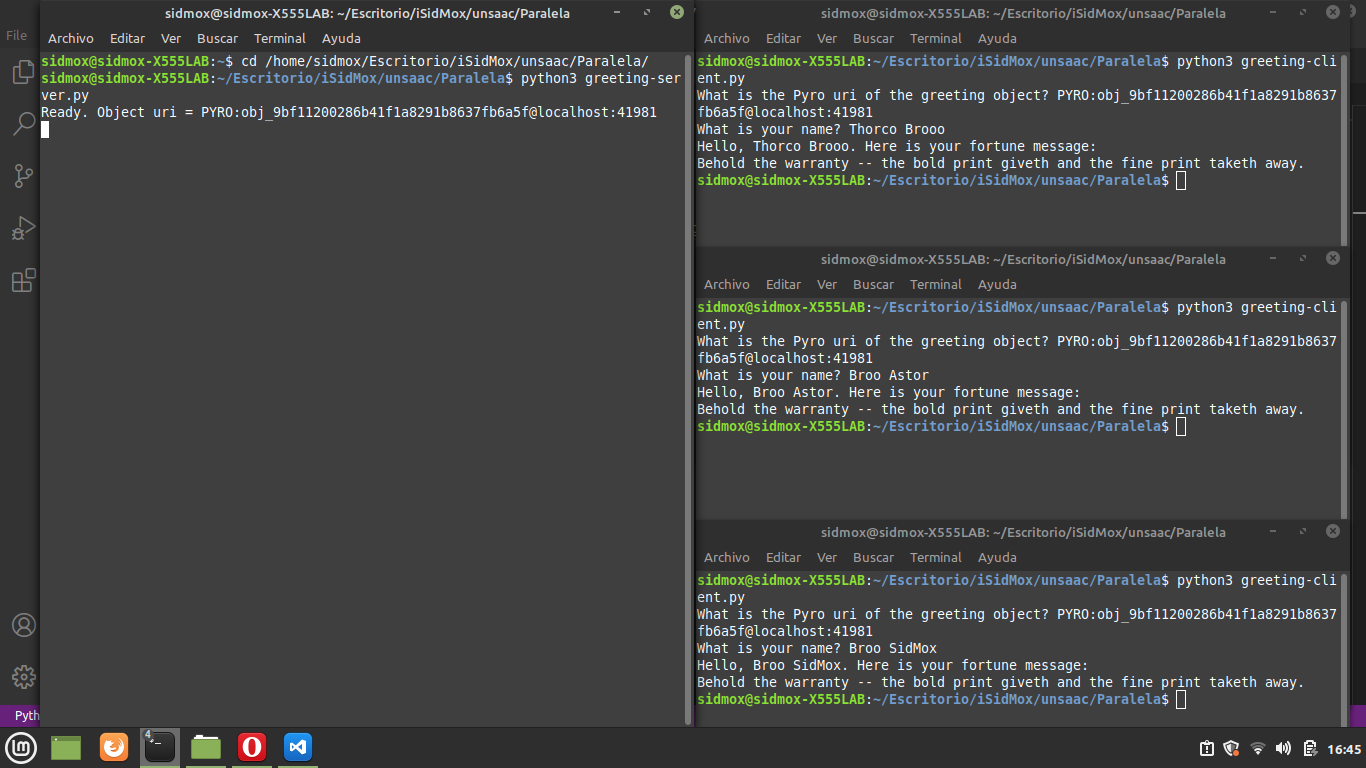


Hay que considerar que insertamos los datos de forma secuencial, pero este codigo tiene un uso Paralelo. Ya que si nuestro servidor estuviera  en la red habria personas que entrarian al mismo tiempo sin saberlo y nuestro codigo funcionaria al mismo tiempo.

¿Por que es un MIMD?
Ya que podemos identificar que habra multiples usuarios (Multiple Data) que lo usaran al mismo tiempo y greeting-client.py tiene mas de una instruccion (Multiple Instructions), pide datos y devuelve otros. podemos afirmar que es un MIMD.




---



Ejercicio Propuesto: Crear un ejemplo que muestre una computación paralela de tipo MISD

In [ ]:
import threading
import time

def print_time(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n)
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(), count))

def print_time2(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n)
        count+=2
        print("%s: %s. count %s" % ( name, time.ctime(), count))

t1 = threading.Thread(target=print_time, args=("Thread-1", 0, ) )
t2 = threading.Thread(target=print_time2, args=("Thread-2", 0, ) )

t1.start()
t2.start()


Para el Hilo: Thread-1, en el momento: Thu Dec 10 00:56:21 2020, su valor de count es: 0Para el Hilo: Thread-2, en el momento: Thu Dec 10 00:56:21 2020, su valor de count es: 0
Thread-1: Thu Dec 10 00:56:21 2020. count 1
Thread-1: Thu Dec 10 00:56:21 2020. count 2
Thread-1: Thu Dec 10 00:56:21 2020. count 3
Thread-1: Thu Dec 10 00:56:21 2020. count 4
Thread-1: Thu Dec 10 00:56:21 2020. count 5

Thread-2: Thu Dec 10 00:56:21 2020. count 2
Thread-2: Thu Dec 10 00:56:21 2020. count 4
Thread-2: Thu Dec 10 00:56:21 2020. count 6
time: 22.6 ms


Tenemos dos instruciones en a que print_time() da un contador de 1 en 1 y print_time2() va de 2 en 2, ambos hasta llegar a un valor mayor a 5, ademas tenemos un solo dato en la entrada. Claro nos dara diferentes resultados pero ambos van al mismo tiempo.
Entonces es un MISD.

**Referencias**

https://wiki.python.org/moin/ParallelProcessing

https://numba.readthedocs.io/en/stable/user/parallel.html

https://ao.gl/how-to-measure-execution-time-in-google-colab/

http://noisymime.org/blogimages/SIMD.pdf